In [1]:
# PCA

In [2]:
import numpy as np
import pandas as pd
import os

def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

# Plot Package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# display plots in this notebook
%matplotlib inline

In [10]:
import glob

RAW_PATH = '/home/xli/Data/Haihui/CD8-HP/histone_mark/RPKM/95354/'
#os.chdir(RAW_PATH)#
INPUT_LIST = os.listdir(RAW_PATH)
File_Name="RPKM_read_count"
RPKM_Set=glob.glob(RAW_PATH+File_Name+'_*.csv')

index_prefix = 1+len(RAW_PATH+File_Name)

df=pd.DataFrame(columns=['gene_id'])
for x in RPKM_Set:
    label=x[index_prefix:-33]
    print (label)
    df_tem=pd.read_csv(x,sep='\t').rename(columns={'RPKM':label})
    df=df.merge(df_tem, on='gene_id',how='outer')
df_ALL_DEGs=df.set_index('gene_id')

naive-WT-CD8-1_201903
19092FL-05-01-01
naive-WT-CD8-2_201903
dKO_CD8_K27Ac_201603
19092FL-05-01-03
ctrl_CD8_K27Ac_201603
naive-dKO-CD8-2_201903


In [14]:
import glob
#Folder_Name='/RPKM'
RAW_PATH = '/home/xli/Data/Haihui/CD8-HP/histone_mark/RPKM/95354/'
#'5197'
#os.chdir(RAW_PATH)#
INPUT_LIST = os.listdir(RAW_PATH)
RPKM_Set=glob.glob(RAW_PATH+'read_count*.bed')

len_raw = len(RAW_PATH)
len_prefix = len('read_count_')

df=pd.DataFrame(columns=[0,1,2,3])
for x in RPKM_Set:
    label=x[len_raw+len_prefix:-33]
    print (label)
    df_tem=pd.read_csv(x,sep='\t',header=None).rename(columns={4:label})
    df = df.merge(df_tem, on=[0,1,2,3], how='outer')
#df_ALL_DEGs=df.set_index('3')

naive-WT-CD8-2_201903
19092FL-05-01-01
naive-WT-CD8-1_201903
naive-dKO-CD8-2_201903
ctrl_CD8_K27Ac_201603
19092FL-05-01-03
dKO_CD8_K27Ac_201603


In [11]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = df_2.index #[x.encode('ascii', 'ignore') for x in df_2.index.values]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets=df_2.columns #[x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'] )


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf=principalDf.sort_index()
targets=  principalDf.index #[x.encode('ascii', 'ignore') for x in principalDf.index]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

print ("PCA Number of Components:" + str(pca.n_components_)  )
print ("PCA Explained Variance Ratio: " + str(pca.explained_variance_ratio_) )  
principalDf


PCA Number of Components:3
PCA Explained Variance Ratio: [0.39470969 0.24038044 0.13034675]


,PC1,PC2,PC3
19092FL-05-01-01,-28.869662,-196.545431,190.154189
19092FL-05-01-03,-257.881583,-185.881865,-74.303206
ctrl_CD8_K27Ac_201603,307.487817,0.587000,-44.204203
dKO_CD8_K27Ac_201603,259.442319,-77.340808,-68.502966
naive-WT-CD8-1_201903,-44.235032,224.035095,82.791264
naive-WT-CD8-2_201903,-70.679746,159.081994,75.629523
naive-dKO-CD8-2_201903,-165.264113,76.064015,-161.564601


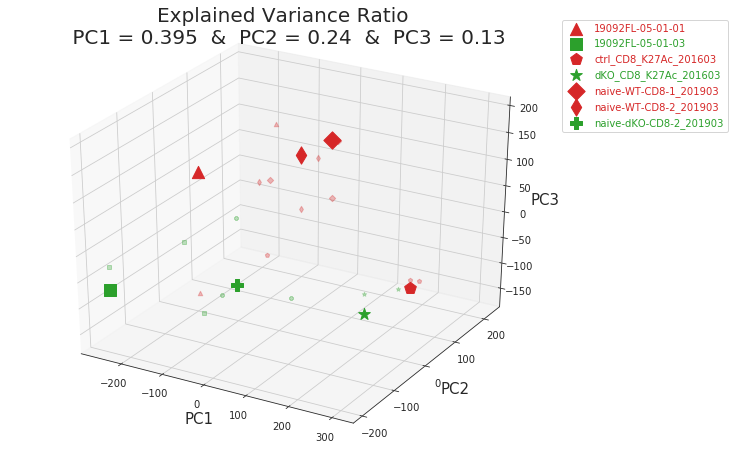

In [13]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
### PLOT
length_box=30

fig = plt.figure(figsize = (10,8))#
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3))+
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)) 
             , fontsize = 20)

#WT-na Red C3 DKO-na Green C2 WT-s Blue C9  DKO-s Navy C0

colors = ['C3','C2','C3','C2',
          'C3','C3','C2',
          'C2',
          'b','b','C0','C0',
          'C3','C3','b','b',
          'C2','C2','C0','C0']

i=0
#('o','o','^','^','D','D','d','D' )# ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')

filled_markers =   ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')



for target, color in zip(targets,colors):
    indicesToKeep = principalDf.index == target
    i+=1
    order_replicates=i%(len(filled_markers))
    xs=principalDf.loc[indicesToKeep, 'PC1']
    ys=principalDf.loc[indicesToKeep, 'PC2']
    zs=principalDf.loc[indicesToKeep, 'PC3']
    ### Projection Plot
    ax.scatter(xs, ys, -1.0*length_box, marker=filled_markers[order_replicates],c=color, alpha=0.3, label='_nolegend_')
    ax.scatter(-1.0*length_box , ys, zs, marker=filled_markers[order_replicates],c=color, alpha=0.3,label='_nolegend_')
    ax.scatter(xs,length_box, zs, marker=filled_markers[order_replicates],c=color, alpha=0.3,label='_nolegend_')
    ### 3D Plot
    ax.scatter3D(xs,ys,zs,marker=filled_markers[order_replicates],c=color,s=150, depthshade=True, label=target)
    

legend_object = ax.legend(targets, loc='best', bbox_to_anchor=(0.5, 1, 0.8,0))

# change the font colors to match the line colors:
i=0
for text in legend_object.get_texts():
    text.set_color(colors[i])
    i+=1

#ax.set_xlim(-length_box,length_box)
#ax.set_ylim(-length_box,length_box)
#ax.set_zlim(-length_box,length_box)
ax.grid()



(95354, 7)

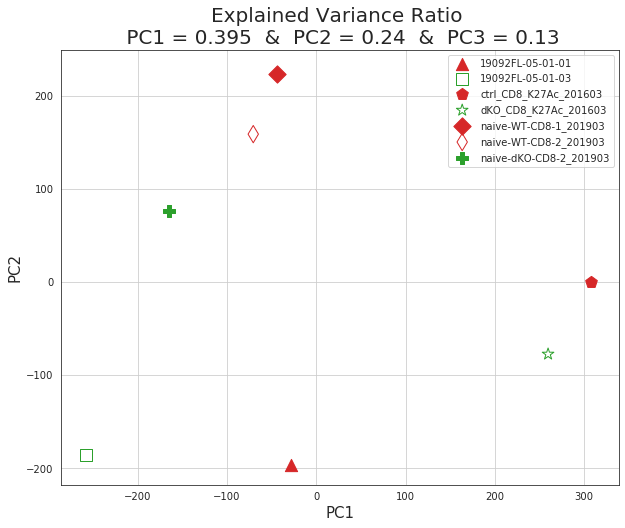

In [12]:
### PLOT
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3)) +
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)), fontsize = 20)

#WT-na Red C3 DKO-na Green C2 WT-s Blue C9  DKO-s Navy C0

colors = ['C3','C2','C3','C2',
          'C3','C3','C2',
          'C2',
          'b','b','C0','C0',
          'C3','C3','b','b',
          'C2','C2','C0','C0']

i=0
filled_markers = ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')


for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    i+=1
    order_replicates=i%(len(filled_markers))
    if (i%2 == 0):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, edgecolor=color, facecolor='none', marker=filled_markers[order_replicates])
    else:
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, c=color,marker=filled_markers[order_replicates])
    
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

Text(0.5, 1.0, 'Explained Variance Ratio \n PC1 = 0.343  &  PC2 = 0.233  &  PC3 = 0.123')

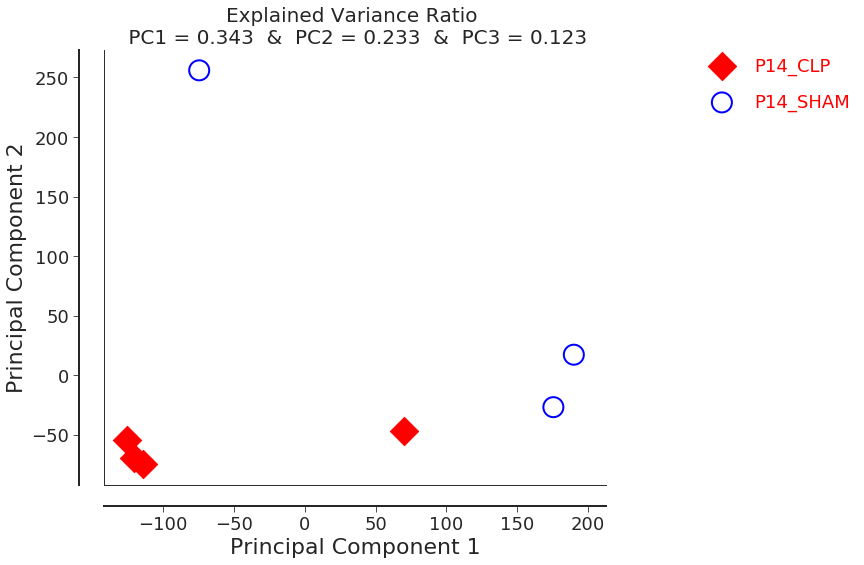

In [70]:
#########################################################################
label_set = ['P14_CLP', 'P14_SHAM', 'Tcf1$^{-/-}$Lef1$^{-/-}$, stim', 'WT, naive']
#########################################################################
### PLOT
#matplotlib.rcParams['font.sans-serif'] = ['Arial'] #, ['sans-serif']

fig = plt.figure(figsize = (9,8))
ax = fig.add_subplot(1,1,1) 

#ax.set_title('Two components PCA', fontsize = 20)

colors = ['red','red','red', 'red',
          'blue','blue','blue',
          'red','red','red',
          'blue','blue','blue']

filled_markers = ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')

i=0
s_size=400
alpha_value=1
for target, color in zip( targets,colors):
    i+=1
    indicesToKeep = principalDf.index == target
    if (i in {0,1,2,3,4}):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, c=color, alpha=alpha_value, marker="D", label=label_set[0] if i%3 == 0 else '')
    elif(i in {5,6,7}):
         ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, alpha=alpha_value, facecolors='none', 
                    edgecolors=color, linewidths=2, label=label_set[1] if i%3 == 0 else '')
    elif (i in {10,11,12}):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, alpha=alpha_value, marker="D", facecolors='none', 
                   edgecolors=color, linewidths=2, label=label_set[2] if i%3 == 0 else '')
    else:
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = s_size, c=color, alpha=alpha_value, label=label_set[3] if i%3 == 0 else '')

    

legend_object = ax.legend(loc="upper right", bbox_to_anchor=(0.50,1, 1,0),edgecolor='w',
          borderaxespad=0,fancybox=True, shadow=False,  fontsize=18, labelspacing=1.0)

# change the font colors to match the line colors:
i=0
for text in legend_object.get_texts():
    text.set_color(colors[i*3])
    i+=1
#ax.set_xlim(-2,8)
#ax.grid(off)



ax2 = ax.twiny()
ax3 = ax.twinx()
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax3.yaxis.set_ticks_position("left")
ax3.yaxis.set_label_position("left")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.05))
ax2.spines["bottom"].set_linewidth(2)
ax3.spines["left"].set_position(("axes", -0.05))
ax3.spines["left"].set_linewidth(2)


#ax2.set_frame_on(True)
#ax3.set_frame_on(True)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

ax2.set_xlim(ax.get_xlim())
ax3.set_ylim(ax.get_ylim())
ax2.tick_params(axis='x',which='major', direction='out', length=6, labelsize=18)
ax2.tick_params(axis='x',which='minor', direction='out', length=6, labelsize=18)
ax3.tick_params(axis='y',which='major', direction='out', length=6, labelsize=18)
ax3.tick_params(axis='y',which='minor', direction='out', length=6, labelsize=18)

ax2.set_xlabel('Principal Component 1', fontsize = 22, fontname='Arial')
ax3.set_ylabel('Principal Component 2', fontsize = 22, fontname="Arial")


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


Parameters_Detail='Vlad_PCA_'
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3)) +
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)), fontsize = 20)
#fig.savefig('PCA'+Parameters_Detail+'.png')

(50423, 7)

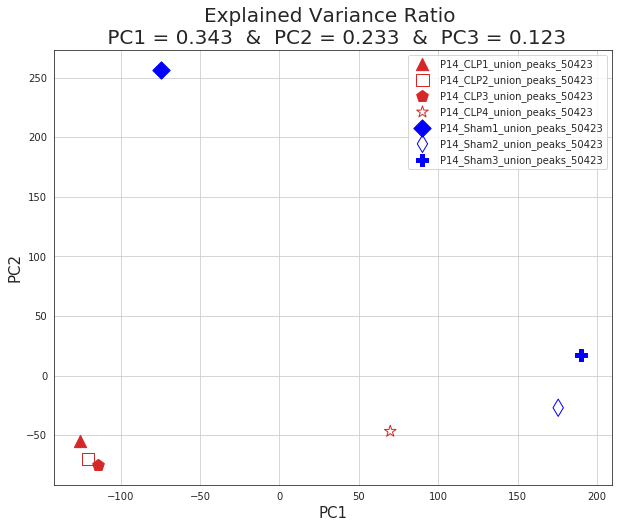

In [75]:
### PLOT
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3)) +
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)), fontsize = 20)

#WT-na Red C3 DKO-na Green C2 WT-s Blue C9  DKO-s Navy C0

colors = ['C3','C3','C3','C3','b','b','b',
          'C2',
          'b','b','C0','C0',
          'C3','C3','b','b',
          'C2','C2','C0','C0']

i=0
filled_markers = ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')


for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    i+=1
    order_replicates=i%(len(filled_markers))
    if (i%2 == 0):
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, edgecolor=color, facecolor='none', marker=filled_markers[order_replicates])
    else:
        ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , s = 150, c=color,marker=filled_markers[order_replicates])
    
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

In [ ]:
### PCA 3D

In [ ]:


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
### PLOT
length_box=30

fig = plt.figure(figsize = (10,8))#
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('Explained Variance Ratio \n PC1 = ' + str(round(pca.explained_variance_ratio_[0],3))+
             '  &  PC2 = '+str(round(pca.explained_variance_ratio_[1],3))+
             '  &  PC3 = '+str(round(pca.explained_variance_ratio_[2],3)) 
             , fontsize = 20)

#WT-na Red C3 DKO-na Green C2 WT-s Blue C9  DKO-s Navy C0

colors = ['C1','C1',
          'C2','C2',#'C2','C2','C2','C2','C2','C2',
          'C6','C6',
          'C4','C4',#'C4','C4',
          'C5','C5',#'C5','C5','C5',
          'C9','C9',#'C9','C9','C9','C9','C9','C9','C9','C9',
          'C3','C3',
          'C0','C5','C6','C7','C8','C3','C3','C3','C3','C3',
    'C3','C3','C3','C0','C0','C3',
          'C2','C2','C2', 'C4','C4',
          'C5','C5', 'C6','C6', 'C7', 'C7','C7',
         'C6','C6','C7','C7','C8','C8','C4','C4','C4','C4','C4',
         'C5','C5','C5','C5','C6','C6','C7','C7','C8','C8','C4','C4','C4','C4','C4',
         'C0','C0','C0','C1','C1','C1']

i=0
#('o','o','^','^','D','D','d','D' )# ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')

filled_markers =   ('o', '^', 's', 'p', '*', 'D', 'd', 'P', 'X')



for target, color in zip(targets,colors):
    indicesToKeep = principalDf.index == target
    i+=1
    order_replicates=i%(len(filled_markers))
    xs=principalDf.loc[indicesToKeep, 'PC1']
    ys=principalDf.loc[indicesToKeep, 'PC2']
    zs=principalDf.loc[indicesToKeep, 'PC3']
    ### Projection Plot
    ax.scatter(xs, ys, -1.0*length_box, marker=filled_markers[order_replicates],c=color, alpha=0.3, label='_nolegend_')
    ax.scatter(-1.0*length_box , ys, zs, marker=filled_markers[order_replicates],c=color, alpha=0.3,label='_nolegend_')
    ax.scatter(xs,length_box, zs, marker=filled_markers[order_replicates],c=color, alpha=0.3,label='_nolegend_')
    ### 3D Plot
    ax.scatter3D(xs,ys,zs,marker=filled_markers[order_replicates],c=color,s=150, depthshade=True, label=target)
    

ax.legend(targets, loc='best', bbox_to_anchor=(0.5, 1, 0.8,0))

# change the font colors to match the line colors:
i=0
for text in legend_object.get_texts():
    text.set_color(colors[i])
    i+=1

#ax.set_xlim(-length_box,length_box)
#ax.set_ylim(-length_box,length_box)
#ax.set_zlim(-length_box,length_box)
ax.grid()

